In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def root(node_list):
  max_x = max(sublist[0] for sublist in node_list)
  max_y = max(sublist[1] for sublist in node_list)
  min_x = min(sublist[0] for sublist in node_list)
  min_y = min(sublist[1] for sublist in node_list)
  if max_x % 2 == 1: 
    max_x += 1
  if max_y % 2 == 1: 
    max_y += 1
  w = max_x - min_x
  h = max_y - min_y
  return min_x, min_y, max_x, max_y, w, h

class QuadTree():
    def __init__(self, min_x, min_y, max_x, max_y, w, h, k, node_list):
        x, y, knnclass = (sublist[0] for sublist in node_list), (sublist[1] for sublist in node_list), (sublist[2] for sublist in node_list) 
        self.x0 = min_x
        self.x1 = max_x
        self.y0 = min_y
        self.y1 = max_y
        self.width = w
        self.height = h
        k = len(node_list)
        self.children = []

    def divide(k, w, h, max_x, max_y, min_x, min_y):
        if k > 2:
          mid_x_ = (w / 2) + min_x
          mid_y_ = (h / 2) + min_y
          
          p = contains(min_x, min_y, mid_x_, mid_y_)
          #x1 = Node(min_x, min_y, mid_x_, mid_y_, p) #reset four corners of box
          divide(x1, k)

          p = contains(min_x, min_y+mid_y_, mid_x_, mid_y_)
          #x2 = Node(min_x, min_y+mid_y_, mid_x_, mid_y_, p)
          divide(x2, k)

          p = contains(min_x+mid_x_, min_y, mid_x_, mid_y_)
          #x3 = Node(min_x + mid_x_, min_y, mid_x_, mid_y_, p)
          divide(x3, k)

          p = contains(min_x+mid_x_, min_y+mid_y_, mid_x_, mid_y_)
          #x4 = Node(min_x+mid_x_, min_y+mid_y_, mid_x_, mid_y_, p)
          divide(x4, k)



def contains(x, y, w, h, node_list):
   pts = []
   for point in node_list:
       if point.x >= x and point.x <= x+w and point.y>=y and point.y<=y+h:
           pts.append(point)
   return pts


#(x, y; c)

6 6


In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

data = pd.read_excel('Rice_Cammeo_Osmancik.xlsx', engine='openpyxl')
print(data)

       Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231  525.578979         229.749878          85.093788      0.928882   
1     14656  494.311005         206.020065          91.730972      0.895405   
2     14634  501.122009         214.106781          87.768288      0.912118   
3     13176  458.342987         193.337387          87.448395      0.891861   
4     14688  507.166992         211.743378          89.312454      0.906691   
...     ...         ...                ...                ...           ...   
3805  11441  415.858002         170.486771          85.756592      0.864280   
3806  11625  421.390015         167.714798          89.462570      0.845850   
3807  12437  442.498993         183.572922          86.801979      0.881144   
3808   9882  392.296997         161.193985          78.210480      0.874406   
3809  11434  404.709991         161.079269          90.868195      0.825692   

      Convex_Area    Extent     Class  
0          

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.model_selection import train_test_split

quant = data.drop(['Class'], axis=1)
qual = data['Class']

X_train, X_test, y_train, y_test = train_test_split(quant, qual, train_size=0.8)

#normalize
object = StandardScaler()
std_xtrain = object.fit_transform(X_train)
std_xtest = object.fit_transform(X_test)

#reduce data to two dimensions
pca = decomposition.PCA(n_components=2)

std_xtrain = pd.DataFrame(std_xtrain, columns = X_train.columns)
std_xtest = pd.DataFrame(std_xtest, columns = X_test.columns)

X_train_reduced = pca.fit_transform(std_xtrain)
xtrain_pc0 = X_train_reduced[:, 0]
xtrain_pc1 = X_train_reduced[:, 1]
train_data = []

X_test_reduced = pca.fit_transform(std_xtest)
xtest_pc0 = X_test_reduced[:, 0]
xtest_pc1 = X_test_reduced[:, 1]
test_data = []

train_data = zip(xtrain_pc0, xtrain_pc1, y_train)
test_data = zip(xtest_pc0, xtest_pc1, y_test)


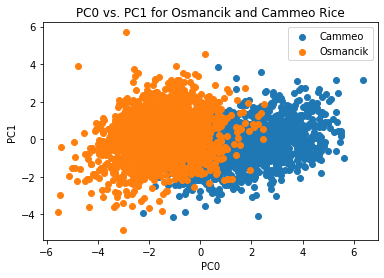

In [ ]:
dataDF = pd.DataFrame(train_data)
cammeo = dataDF[dataDF[2] == 'Cammeo']
osmancik = dataDF[dataDF[2] == 'Osmancik']
plt.scatter(cammeo[0], cammeo[1], label='Cammeo')
plt.scatter(osmancik[0], osmancik[1], label='Osmancik')
plt.title('PC0 vs. PC1 for Osmancik and Cammeo Rice')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.legend()
plt.show()